In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pycountry_convert as pc
import random
import plotly.graph_objects as go
import plotly.express as px

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [3]:
#жестко читаем файлы
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')
routes

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2
3,2B,410,CEK,2968,OVB,4078,CR2
4,2B,410,DME,4029,KZN,2990,CR2
...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,SF3
67658,ZM,19016,DME,4029,FRU,2912,734
67659,ZM,19016,FRU,2912,DME,4029,734
67660,ZM,19016,FRU,2912,OSS,2913,734


## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [4]:
#жестко заменяем N с двумя '\', чтобы питон не ругался и выводим инфу
airports.info()
routes.info()
airports = airports.replace('\\N', np.nan)
display(airports)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Co

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,14106,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,NaN,NaN,NaN
7693,14107,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,NaN,NaN,NaN
7694,14108,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,NaN,NaN,NaN
7695,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,NaN,NaN,NaN


## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [5]:
#для отвязки используем метод .copy()
iata_arports = airports[airports['IATA'].notna()].copy()

#воруем код с семинара для соотнесения стран и континентов
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return(country_continent_name)
    except:
        return None

#применяем сворованное -> появляется nan, тк не для всех стран нашли континенты, ниже в коде почистим
iata_arports['Continents'] = iata_arports['Country'].map(country_to_continent)
iata_arports

D:\anaconda\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
D:\anaconda\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,14097,Bilogai-Sugapa Airport,Sugapa-Papua Island,Indonesia,UGU,WABV,-3.739560,137.031998,7348,NaN,NaN,NaN,Asia
7686,14100,Ramon Airport,Eilat,Israel,ETM,LLER,29.723694,35.011416,288,NaN,NaN,NaN,Asia
7687,14101,Rustaq Airport,Al Masna'ah,Oman,MNH,OORQ,23.640556,57.487500,349,NaN,NaN,NaN,Asia
7688,14102,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,NaN,NaN,NaN,Asia


## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

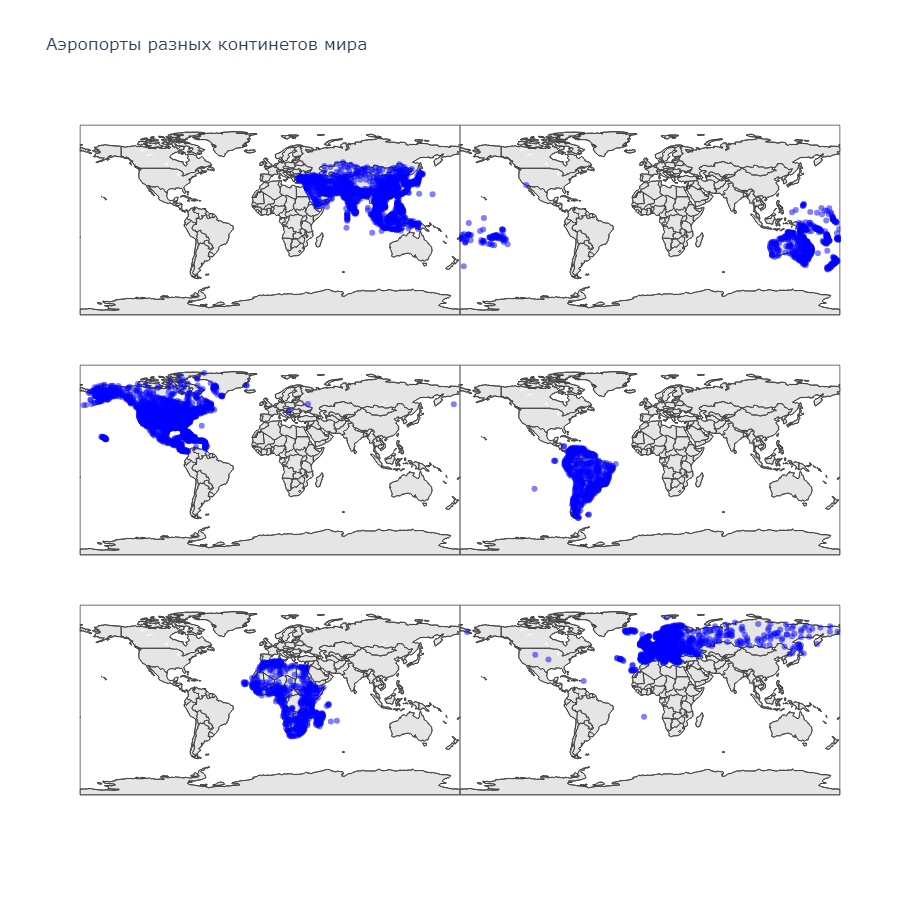

In [259]:
random.seed(45)
#псевдослучайный код с помощью random.seed

#здесь воруем и адаптируем код из интернета
data = []
layout = dict(
    title = 'Аэропорты разных континетов мира',
    autosize = False,
    width = 1000,
    height = 900,
    hovermode = False,
)

#получаем список уникальных континентов и чистим от NA, перемешиваем, чтобы было веселее
continents_list = iata_arports['Continents'].dropna().unique()
random.shuffle(continents_list)

#даём каждому континенту свой геоключ и список координат аэропортов в нём
for i in range(len(continents_list)):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    lons = list(iata_arports[ iata_arports['Continents'] == continents_list[i] ]['Longitude'])
    lats = list(iata_arports[ iata_arports['Continents'] == continents_list[i] ]['Latitude'])
    texts = iata_arports[ iata_arports['Continents'] == continents_list[i] ]['Name of airport']
#после присваивания закидываем всё это в дату
    data.append(
        dict(
            type = 'scattergeo',
            showlegend=False,
            lon = lons,
            lat = lats,
            geo = geo_key,
            marker = dict(
                color = "rgb(0, 0, 255)",
                opacity = 0.5
            )
        )
    )
#устанавливаем правила существования каждого отдельного изображения континента
    layout[geo_key] = dict(
        scope = 'world',
        showland = True,
        landcolor = 'rgb(229, 229, 229)',
        showcountries = True,
        domain = dict( x = [], y = [] ),
        subunitcolor = "rgb(255, 255, 255)"    )

#сильно мучаемся с двойным циклом (но вроде всего на 6 итераций, наверное не страшно) чтобы рассставить всё по местам через domain
z = 0
COLS = 2
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1
        if z > 6:
            break

fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1000)
fig.show()

In [262]:
#Помимо слова "обшибка" замечаем в северной америке - 2 и в европе - 4 затерявшихся аэропорта
#Моя визуализация не позволяет показать их (сколько бы не пытался это исправить), немного не успел сделать ещё две доп визуализации
#Но магия общения с однокурсниками может указать нам на ошибки, исправим
iata_arports.loc[iata_arports['Name of airport'] == 'Oryol Yuzhny Airport', 'Continents'] = 'Europe' 
iata_arports.loc[iata_arports['Name of airport'] == 'Taszár Air Base', 'Continents'] = 'Europe' 
iata_arports.loc[iata_arports['Name of airport'] == 'St. Helena Airport', 'Continents'] = 'Africa' 
iata_arports.loc[iata_arports['Name of airport'] == 'Gustaf III Airport', 'Continents'] = 'North America' 
iata_arports.loc[iata_arports['Name of airport'] == 'Emporia Municipal Airport', 'Continents'] = 'North America' 
iata_arports.loc[iata_arports['Name of airport'] == 'Hunt Field', 'Continents'] = 'North America'


## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [146]:
random.seed(45)
#выбираем случайный континент
cont = continents_list[random.randint(0,len(continents_list))]
#берём таблицу вылетов
sources = routes[['Source airport','Destination airport']].merge(iata_arports[iata_arports['Continents'] == cont ][['IATA','Country']], left_on = ['Source airport'], right_on = ['IATA'], how = 'inner').groupby('Country').count()
#Ctrl+c, Ctrl+V и получаем таблицу прилётов
destin = routes[['Source airport','Destination airport']].merge(iata_arports[iata_arports['Continents'] == cont ][['IATA','Country']], left_on = ['Destination airport'], right_on = ['IATA'], how = 'inner').groupby('Country').count()
#делаем внешний merge, чтобы ничего не потерять
country_act = sources.merge(destin, on = 'Country', how = 'outer')[['Source airport_x', 'Destination airport_y']].rename(columns = {'Source airport_x': 'Число вылетов','Destination airport_y': 'Число прилётов'}) 

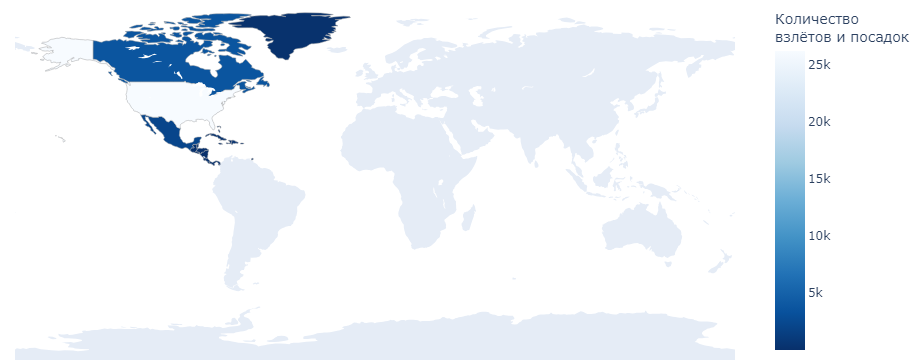

In [261]:
#5.2
#ВиЗуАлИзАцИя, но для начала добавим столбец с alpha3 для стран из-за специфики визуализации
full_country_act = pd.DataFrame(country_act.sum(axis = 1), columns = ['aaa']).reset_index()
full_country_act['alpha3'] = full_country_act['Country'].map(pc.country_name_to_country_alpha3)

fig = go.Figure(data=go.Choropleth(
    locations = full_country_act['alpha3'],
    z = full_country_act['aaa'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Количество<br>взлётов и посадок',
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

Country               City IATA   Sum
Continents                                                            
Africa        382           South Africa       Johannesburg  JNB   321
              524                  Egypt              Cairo  CAI   303
              2049                 Kenya            Nairobi  NBO   258
              493                Morocco         Casablanca  CMN   250
              509               Ethiopia        Addis Ababa  ADD   214
              132                Algeria             Algier  ALG   176
              177                Tunisia              Tunis  TUN   175
              494                Morocco          Marrakech  RAK   145
              501                Senegal              Dakar  DKR   134
              171                Nigeria              Lagos  LOS   119
Asia          1652                 China            Beijing  PEK  1069
              1689                 China           Shanghai  PVG   825
              1617             Singapore          Singapore  SIN   820
              1953           South Korea              Seoul  ICN   740
              3237                Turkey           Istanbul  IST   719
              1022  United Arab Emirates              Dubai  DXB   710
              1491             Hong Kong          Hong Kong  HKG   710
              1656                 China          Guangzhou  CAN   674
              1929              Thailand            Bangkok  BKK   656
              1681                 China            Chengdu  CTU   647
Europe        256         United Kingdom             London  LHR  1051
              629                 France              Paris  CDG  1041
              192                Germany          Frankfurt  FRA   990
              283            Netherlands          Amsterdam  AMS   903
              571                  Spain          Barcelona  BCN   783
              197                Germany             Munich  MUC   728
              254         United Kingdom             London  LGW   708
              706                  Italy               Rome  FCO   662
              579                  Spain             Madrid  MAD   661
              2025                Russia             Moscow  DME   649
North America 1819         United States            Atlanta  ATL  1826
              1895         United States            Chicago  ORD  1108
              1725         United States        Los Angeles  LAX   990
              1810         United States  Dallas-Fort Worth  DFW   936
              1880         United States           New York  JFK   911
              1863         United States             Denver  DEN   735
              1763         United States              Miami  MIA   734
              124                 Canada            Toronto  YYZ   636
              1923         United States          Charlotte  CLT   600
              1864         United States       Philadelphia  PHL   576
Oceania       1649             Australia             Sydney  SYD   410
              1620             Australia           Brisbane  BNE   296
              1636             Australia          Melbourne  MEL   269
              939            New Zealand           Auckland  AKL   213
              1643             Australia              Perth  PER   182
              1622             Australia             Cairns  CNS   110
              3         Papua New Guinea       Port Moresby  POM   102
              1637             Australia           Adelaide  ADL   102
              2000             Australia             Darwin  DRW    90
              903                   Fiji              Nandi  NAN    83
South America 1193                Brazil          Sao Paulo  GRU   387
              1267              Colombia             Bogota  BOG   307
              1321                  Peru               Lima  LIM   230
              1172                Brazil           Brasilia  BSB   197
              1191                Brazil     Rio De Janei

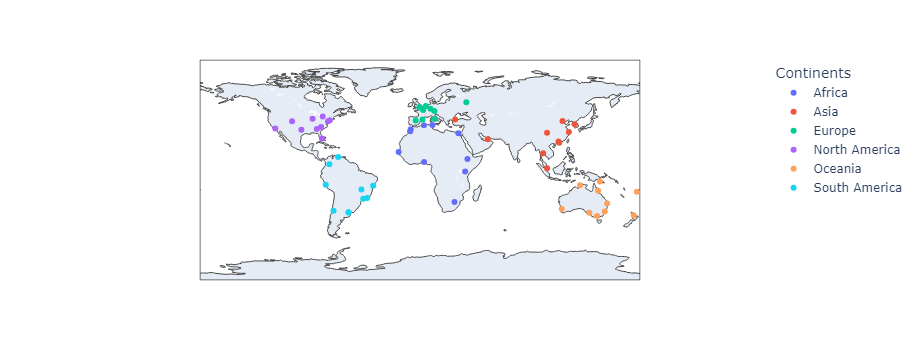

In [258]:
#делаем почти то же , что и в прошлых пунктах, но по-другому
df_road_source = routes.groupby("Source airport")["Source airport ID"].count()
df_road_source = df_road_source.reset_index()
df_road_source.columns = ['IATA', 'Departure number']
# копируем + вставляем
df_road_destination = routes.groupby("Destination airport")["Destination airport ID"].count()
df_road_destination = df_road_destination.reset_index()
df_road_destination.columns = ['IATA', 'Arrival number']

#объединяем, получаем столбец суммы
df_road = pd.merge(df_road_source, df_road_destination, on='IATA')
df_road['Sum'] = df_road['Departure number'] + df_road['Arrival number']

df_result = pd.merge(iata_arports, df_road, on='IATA')

#группируем и выводим топ-10
df_top10 = df_result.groupby('Continents').apply(lambda x: x.nlargest(10, columns=['Sum']))
#Ответ
display(df_top10[['Country', 'City', 'IATA', 'Sum']])
#Визуализация
fig = px.scatter_geo(df_top10,
    lon = df_top10.Longitude,
    lat = df_top10.Latitude,
    color = 'Continents'
    )

fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [263]:
#Чистим
routes['Desination airport'] = routes['Destination airport'].dropna()
#Воруем данные с вики
dji = pd.read_html('https://en.wikipedia.org/wiki/List_of_aircraft_type_designators')[0][['IATA type code', 'Model']]
#Добавляем их к таблице
i_wanna_die = routes.merge(dji, left_on = 'Equipment', right_on = 'IATA type code')
#Группирем считаем и получаем 10 самых популярных
i_wanna_die.groupby('Model').count().nlargest(10, columns = ['Destination airport'])['Destination airport'].reset_index()


,Model,Destination airport
0,Airbus A320,9180
1,Boeing 737-800,7124
2,Airbus A319,3420
3,Boeing 737-800 Winglets,2043
4,Aerospatiale/Alenia ATR 72-201/-202,1194
5,Boeing 737-700 Winglets,1155
6,Airbus A321,1146
7,Embraer 190 / Lineage 1000,1049
8,Airbus A330-300,886
9,De Havilland Canada DHC-8-400 Dash 8Q,866
